In [ ]:
##Improvements to Mapping Traffic Collsions

In [2]:
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx


In [3]:
#Our group now wants to map all of Los Angeles instead of just West LA 
#So I imported Los Angeles County Collision data but filterd it to 2010. 
#This way we can have a smaller data set and compare differnt citites over time


In [4]:
gdf = gpd.read_file('2010_.csv')

In [5]:
#I extraced lat and long from 'Location' 


In [6]:
gdf['lat']=gdf['Location'].str.extract(r'\((.*),.*\)')
gdf['long']=gdf['Location'].str.extract(r'\(.*,(.*)\)')
gdf.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),geometry,lat,long
0,100104094,01/03/2010,01/02/2010,1945,01,Central,0159,997,TRAFFIC COLLISION,,...,"(34.0404, -118.233)",23082,533,1287,,9,28,None,34.0404,-118.233
1,100104092,01/02/2010,01/02/2010,1833,01,Central,0161,997,TRAFFIC COLLISION,0605,...,"(34.0487, -118.2627)",23078,546,1050,,9,76,None,34.0487,-118.2627
2,100204062,01/02/2010,01/02/2010,1345,02,Rampart,0295,997,TRAFFIC COLLISION,,...,"(34.0404, -118.2822)",22723,697,1521,,11,8,None,34.0404,-118.2822
3,100204052,01/02/2010,01/02/2010,0715,02,Rampart,0248,997,TRAFFIC COLLISION,,...,"(34.0594, -118.2644)",23078,566,1047,,11,67,None,34.0594,-118.2644
4,100304112,01/02/2010,01/02/2010,1550,03,Southwest,0397,997,TRAFFIC COLLISION,,...,"(34.0037, -118.3002)",24027,733,1048,7,14,35,None,34.0037,-118.3002


In [7]:
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [8]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

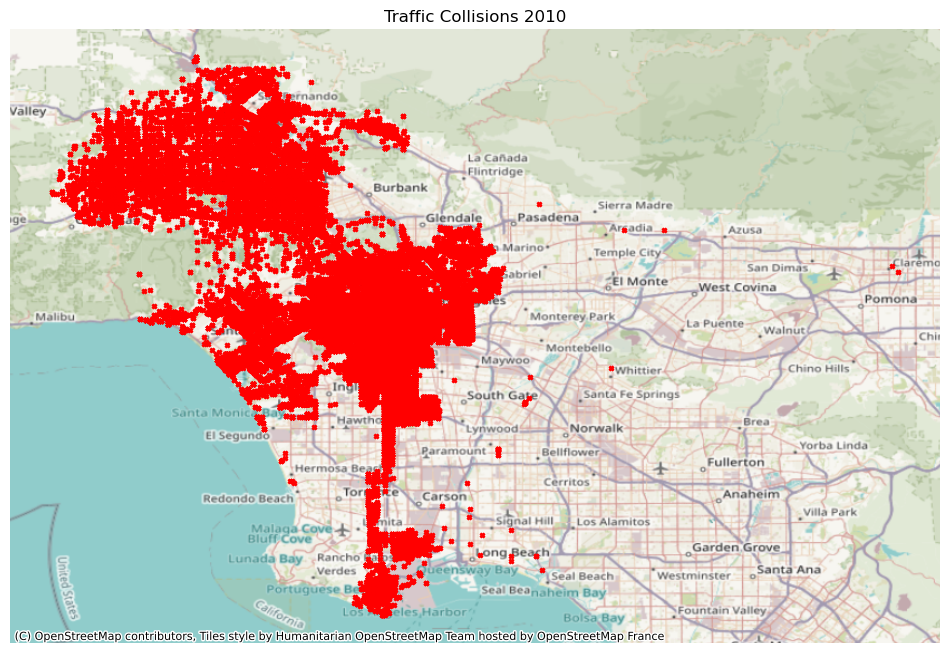

In [9]:
fig, ax = plt.subplots(figsize=(12,12))

# add the data options (Change using .clip)  
ax = gdf.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Traffic Collisions 2010')

# add a basemap
ctx.add_basemap(ax, crs=4326)

In [ ]:
#Im trying to view maps of areas in LA cities but keep getting errors

In [11]:
Area = ["West LA","Hollywood", "Compton"]

In [20]:
# loop through cities
for city in Area:

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    # map options: notice the query to filter by individual city
    gdf[gdf.city == city].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    # no axes
    ax.axis('off')

    # title
    ax.set_title('Fatal police shootings in '+str(city) + ' since 2015')

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, crs=4326)

SyntaxError: cannot assign to literal (896142960.py, line 2)

In [21]:
# convert arrests_mini to geodataframe
gdf = gpd.GeoDataFrame(
    arrests_mini, geometry=gpd.points_from_xy(arrests_mini.lon, arrests_mini.lat),crs=4326)

# check that it can be mapped
gdf.plot()

NameError: name 'arrests_mini' is not defined

In [ ]:
#Importing 2020 crash data 

In [23]:
gdf2 = gpd.read_file('2020.csv')

In [22]:
gdf2 = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [24]:
gdf2['lat']=gdf['Location'].str.extract(r'\((.*),.*\)')
gdf2['long']=gdf['Location'].str.extract(r'\(.*,(.*)\)')
gdf2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified),geometry,lat,long
0,201404116,01/02/2020,01/02/2020,1400,14,Pacific,1497,997,TRAFFIC COLLISION,3006 3026 3034 3037 3101 3401 3701 4014,...,"(33.9454, -118.3711)",23676,2340,445,10,10,16,None,34.0404,-118.233
1,202105187,01/27/2020,01/02/2020,0725,21,Topanga,2155,997,TRAFFIC COLLISION,3006 3030 3028 3101 4021 3032 3037,...,"(34.1865, -118.6103)",4278,297,1473,,4,49,None,34.0487,-118.2627
2,201309786,01/02/2020,01/02/2020,0930,13,Newton,1352,997,TRAFFIC COLLISION,,...,"(34.0039, -118.2653)",22727,716,1342,7,13,,None,34.0404,-118.2822
3,200905447,02/03/2020,01/02/2020,1740,09,Van Nuys,0905,997,TRAFFIC COLLISION,3003 3037 3025 3104 4009 1218,...,"(34.2057, -118.4575)",19733,218,581,,3,18,None,34.0594,-118.2644
4,200306568,02/13/2020,01/02/2020,1415,03,Southwest,0363,997,TRAFFIC COLLISION,4025 3037 3002 3028 3101,...,"(34.011, -118.3351)",22725,761,1024,7,12,54,None,34.0037,-118.3002


In [26]:
gdf2 = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.long, gdf.lat))

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

# add the data options (Change using .clip)  
ax = gdf2.clip([-189,18,-66,71]).plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Traffic Collisions 2020')

# add a basemap
ctx.add_basemap(ax, crs=4326)